# Preface

## How Image Works
Mungkin kita secara tidak sadar selalu melihat gambar di dalam perangkat kita. Tapi, tahukah kita sebetulnya bagaimana cara gambar itu bekerja? Mulai dari kita memotretnya, kemudian muncul di perangkat kita. Itu gimana sih?

Ketika sebuah perangkat (seperti kamera digital) menangkap gambar, prosesnya melibatkan beberapa langkah:

1. **Pengambilan Gambar (Capturing):** Kamera menangkap cahaya yang dipantulkan dari objek dalam pemandangan melalui lensa dan fokusnya pada sensor gambar.

2. **Sampling:** Sensor gambar (seperti CCD atau CMOS) memiliki banyak elemen detektor cahaya yang disebut pixel. Setiap pixel ini mengambil sampel cahaya dari bagian kecil pemandangan. Ini berarti bahwa pemandangan kontinu dipecah menjadi banyak sampel kecil (pixel) yang diskret.

3. **Digitizing:** Cahaya yang diterima oleh setiap pixel diubah menjadi sebuah nilai diskrit (integer warna) yang disebut sebagai pixel. Semakin kecil pixelnya, maka gambar yang dihasilkan juga akan lebih realistis (terlihat lebih kontinu). Nilai integer ini disimpan ke dalam suatu array 2D yang nanti bisa diterjemahkan ke dalam sebuah bentuk gambar.

Semakin kecil pixel yang digunakan (maka pixelnya akan semakin banyak), maka akan semakin bagus juga resolusi dari gambar yang dihasilkan. Tapi perlu diingat bahwa gambar dengan resolusi tinggi berarti menyimpan lebih banyak data. Misalkan sebuah gambar $3*5$ memiliki resoulsi $62.500 pixel/satuan^2$ maka membutuhkan penyimpanan untuk $937.500$ integer warna.

## Image File Format
Beberapa format file gambar yang umum adalah:
1. Raw
Format gambar raw, format ini yang paling boros, tapi paling bagus.
2. JPEG
Format ini lebih tidak memakan memori dengan cara menyimpan posisi pixel yang memiliki tetangga yang sama dibandingkan menyimpan semua nilai pixel. Teknologi ini disebut **lossless compression**.
3. GIF
Format GIF adalah yang paling irit dibanding dua yang lain, format ini akan menscale down warna-warna pixel menjadi hanya 256 bentuk warna saja. Kompresi GIF ini merupakan salah satu bentuk **loss scheme compression**
4. Dan masih banyak format gambar lain.

## Properties of Image
Karena tadi gambar disimpan ke dalam sebuah array 2D, maka cara mengakses nilai pixel pun cukup mudah. Misalkan gambar memiliki ukuran $3*5$ dengan ukurna pixel $1000 pixel/satuan$ maka ukuran dari array 2D nya akan menjadi $3000*5000$ pixel atau elemen. Dan untuk mengakses, misalkan pixel pojok kiri atas, maka kita panggil `pixel[0][0]`. **Tapi** di python, untuk mengakses pixel terdapat sedikit perbedaan dimana `pixel[100][200]` artinya kita mengambil pixel dari baris ke 200 dan kolom ke 100 (dibalik dari biasanya).
Suatu gambar juga 

# Image Processing in Python

## Image module
Image merupakan API dari PIL atau Pillow (Python Imaging Library). Beberapa operasi yang bisa digunakan dengan PIL adalah:
| Image Methods       | Description                                                                                     |
|---------------------|------------------------------------------------------------------------------------------------|
| `i = Image.open(filename)`      | Memuat dan mengembalikan gambar dari file dengan nama file yang diberikan. |
| `i = Image.new(mode = "RGB", width, height)` | Membuat dan mengembalikan gambar kosong dengan dimensi yang diberikan.        |
| `i.width`      | Mengembalikan lebar `i` dalam pixel.                                                          |
| `i.height`     | Mengembalikan tinggi `i` dalam pixel.                                                         |
| `i.getpixel(x, y)`  | Mengembalikan tuple integer yang mewakili nilai RGB dari pixel di posisi `(x, y)`.    |
| `i.putpixel(x, y, (r, g, b))` | Mengganti nilai RGB di posisi `(x, y)` dengan nilai RGB yang diberikan oleh tuple `(r, g, b)`.  |
| `i.show()`          | Menampilkan `i` dalam sebuah pop up         |
| `i.copy()`         | Mengembalikan salinan dari `i`.                                                                |
| `i.save()`          | Menyimpan `i` dengan nama file saat ini. Jika `i` belum memiliki nama file, `save` tidak melakukan apa-apa.                    |
| `i.save(filename)`  | Menyimpan `i` dengan nama file `filename`. By default disimpan dalam format .GIF     |

Untuk mengetahui kode RGB: [RGB Table](https://www.rapidtables.com/web/color/RGB_Color.html)

Kita coba.

In [5]:
from PIL import Image

In [18]:
# Gunakan gambar terserah yang ada di komputer kalian dengan format JPG, JPEG, PNG, atau GIF.
img = Image.open("Gambar Pixel.jpg")

In [7]:
img.width, img.height

(1024, 559)

In [8]:
img.show()

In [21]:
img.getpixel((0,0))

(255, 255, 255)

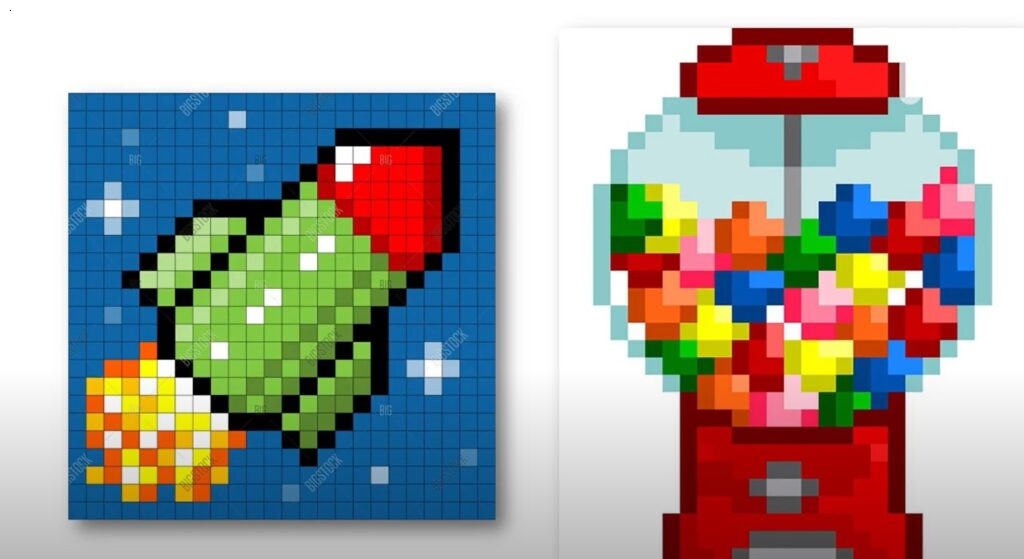

In [22]:
img.putpixel((10,10), (0,0,0))
img

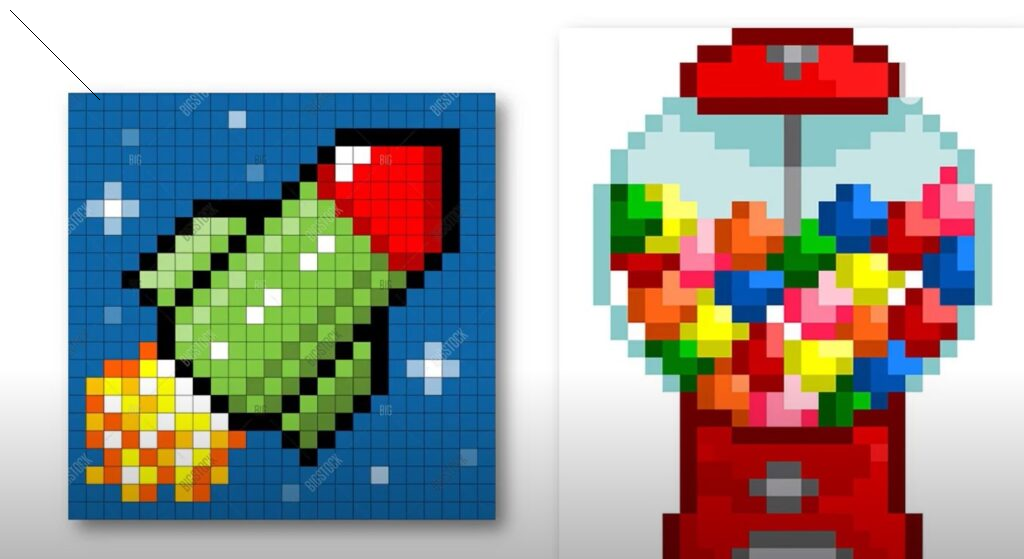

In [23]:
for i in range(10,100):
    img.putpixel((i,i), (0,0,0))

img

In [25]:
img.save("contoh 1.png")

### Contoh Generate Gambar Kosongan
[RGB Code](https://www.rapidtables.com/web/color/RGB_Color.html)

In [51]:
img1 = Image.new(size=(600,400), mode="RGB", color=(240, 240, 240))

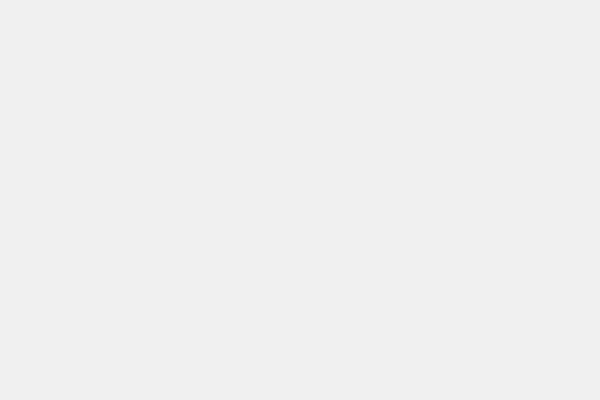

In [52]:
img1

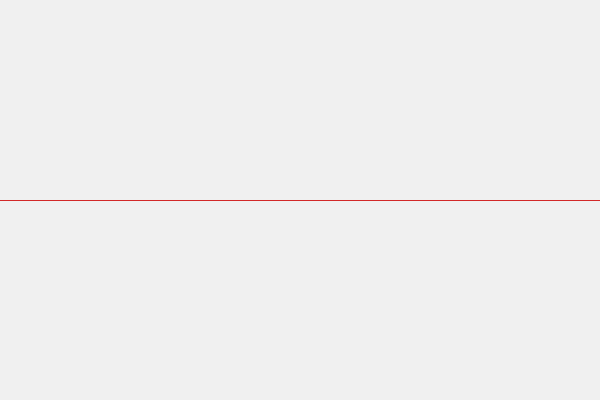

In [53]:
# Coba menggambar sebuah garis
# Garis horizontal di tengah
tengah = img1.height//2
for i in range(img1.width):
    img1.putpixel((i, tengah), (210, 40, 40))
img1

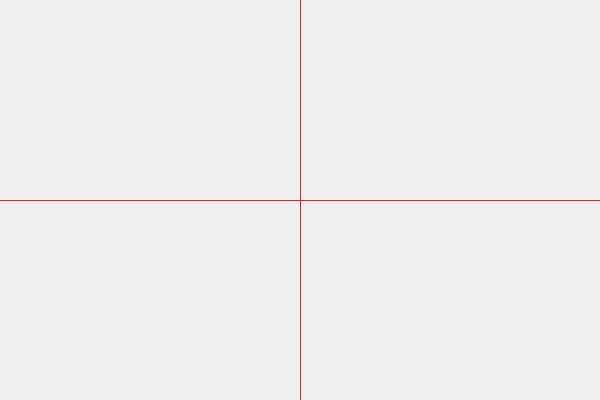

In [55]:
# Coba menggambar sebuah garis
# Garis vertikal di tengah
tengah = img1.width//2
for i in range(img1.height):
    img1.putpixel((tengah, i), (210, 40, 40))
img1

In [56]:
img1.show()

### Contoh mengakses semua pixel di gambar

In [1]:
# ### Column Major Traversal
# # i itu untuk akses semua kolom
# for i in range(img.width):
#     # j untuk akses row
#     for j in range(img.height):
#         # karena disini j di dalam i, maka row akan diselesaikan dulu semuanya dalam 1 column # Column, row
#         print(img.getpixel((i,j)), end=" ")

# ### Row Major Traversal
# # i itu untuk akses semua row
# for i in range(img.height):
#     # j untuk akses column
#     for j in range(img.weight):
#         # karena disini j di dalam i, maka column akan diselesaikan dulu semuanya dalam 1 row
#         print(img.getpixel((i,j)), end=" ")

### Beberapa function yang dapat dibuat untuk processing images

In [21]:
### Rerata tuples
def avg_tuples(tuple):
    return sum(tuple)/len(tuple)
### Filter Black and White sederhana

def bw(image):
    '''
    Pseudocode:
    1. Siapkan kode rgb warna putih (255, 255, 255) dan warna hitam (0,0,0)
    2. Hitung nilai tengah dari hex putih dan hitam
    3. For i in image height,
        for j in image weight,
          Hitung rerata dari R, G, dan B untuk setiap pixel
    4. Jika rerata<nilai tengah maka ganti hitam, lainnya putih.
    5. Return
    '''
    black = (0,0,0)
    white = (255, 255, 255)
    tengah = (avg_tuples(black)+avg_tuples(white))/2
    for i in range(image.height):
        for j in range(image.width):
            rerata = avg_tuples(image.getpixel((j,i)))
            if rerata<tengah:
                image.putpixel((j,i), black)
            else:
                image.putpixel((j,i), white)
    return image

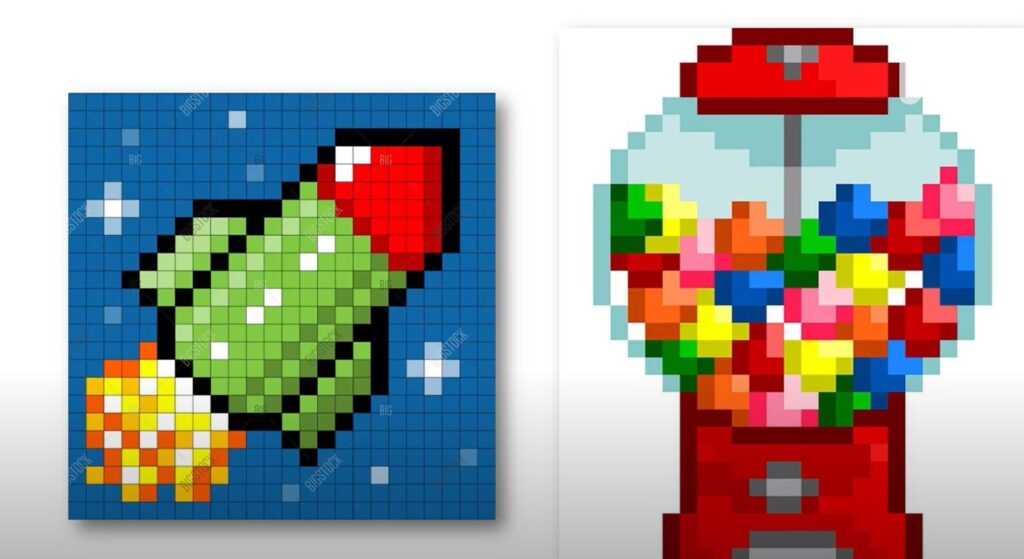

In [19]:
img.copy()

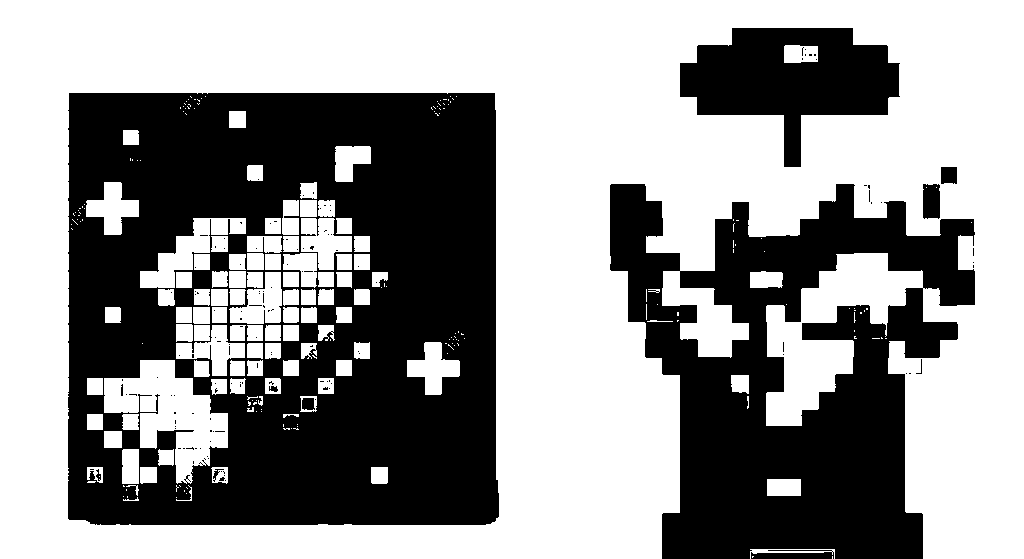

In [22]:
bw(img.copy())

In [25]:
def grayscale(image):
    '''
    Pseudocode:
    1. Untuk setiap range image height:
        Untuk setiap range image width:
          get color untuk setiap pixel
          r *= 0.299
          g *= 0.587
          b *= 0.114
          lum = r+g+b
          image putpixel (lum, lum, lum)
    '''
    for i in range(image.height):
        for j in range(image.width):
            (r, g, b) = image.getpixel((j, i))
            r = int(r * 0.299)
            g = int(g * 0.587)
            b = int(b * 0.114)
            lum = r + g + b
            image.putpixel((j, i), (lum, lum, lum))   
    return image

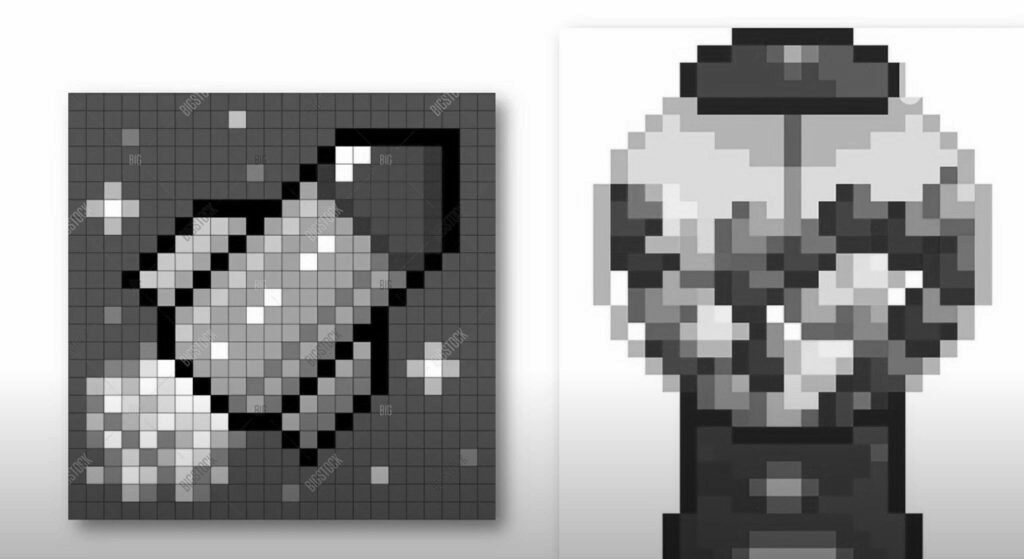

In [26]:
grayscale(img.copy())

In [64]:
def blur(imageori):
    image = imageori.copy()
    for i in range(1, imageori.height-1):
        for j in range(1, imageori.width-1):
            (pixel1, pixel2, pixel3) = imageori.getpixel((j, i))
            (left1, left2, left3)= imageori.getpixel((j-1, i))
            (right1, right2, right3) = imageori.getpixel((j+1, i))
            (upper1, upper2, upper3) = imageori.getpixel((j, i+1))
            (lower1, lower2, lower3) = imageori.getpixel((j, i-1))
            reduction = ((pixel1+left1+right1+lower1)//4, (pixel2+left2+right2+lower2)//4, (pixel3+left3+right3+lower3)//4)
            image.putpixel((j, i), reduction)
            image.putpixel((j-1, i), reduction)
            image.putpixel((j+1, i), reduction)
            image.putpixel((j, i+1), reduction)
            image.putpixel((j, i-1), reduction)
    return image

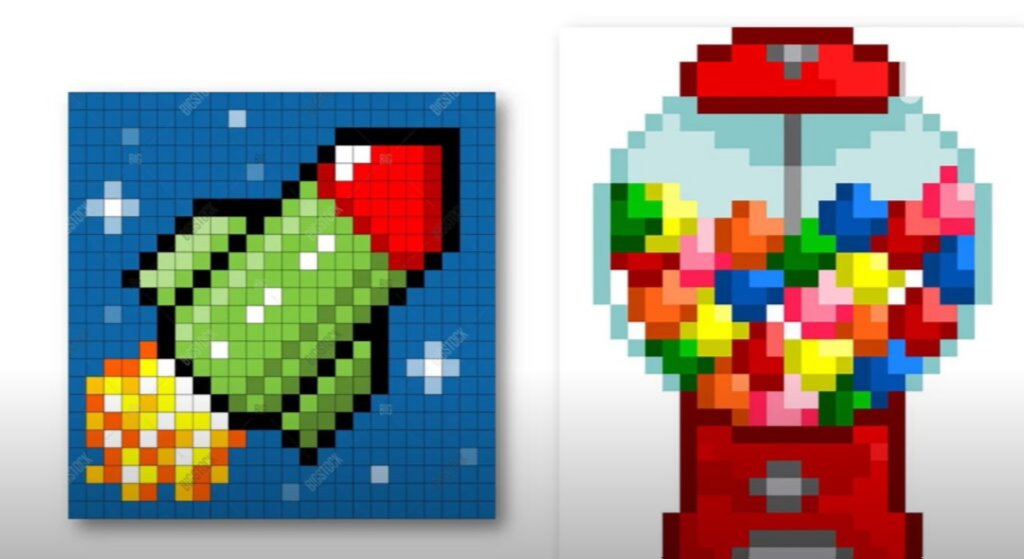

In [65]:
blur(img.copy())

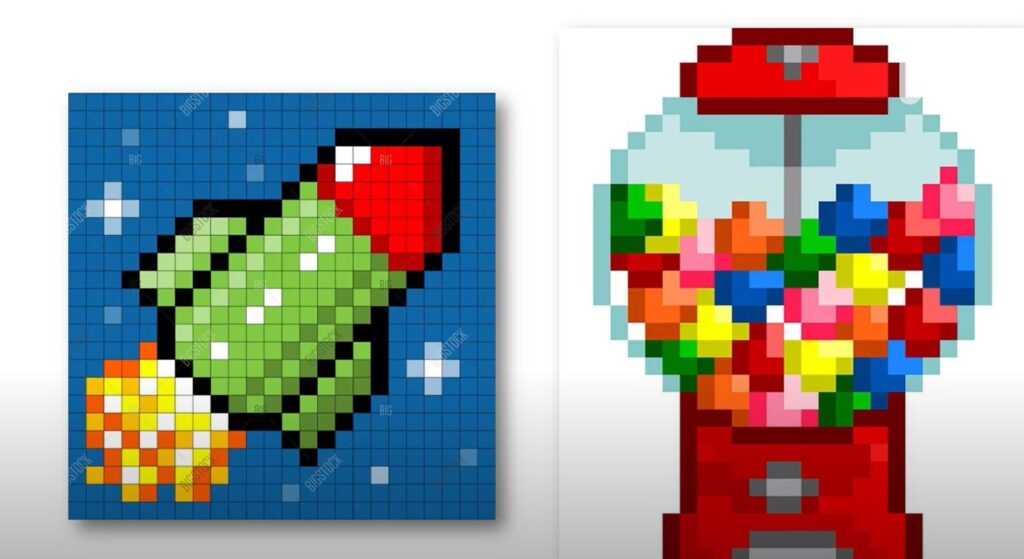

In [73]:
img

In [70]:
def blur_with_factor(image, factor):
    while factor>0:
        image = blur(image)
        factor += -1
    return image

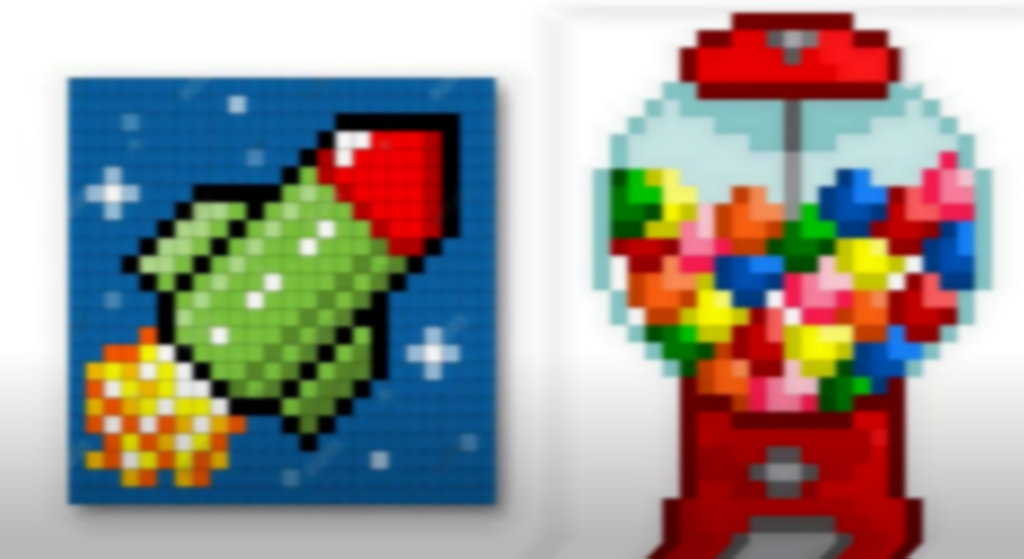

In [72]:
blur_with_factor(img.copy(), 20)

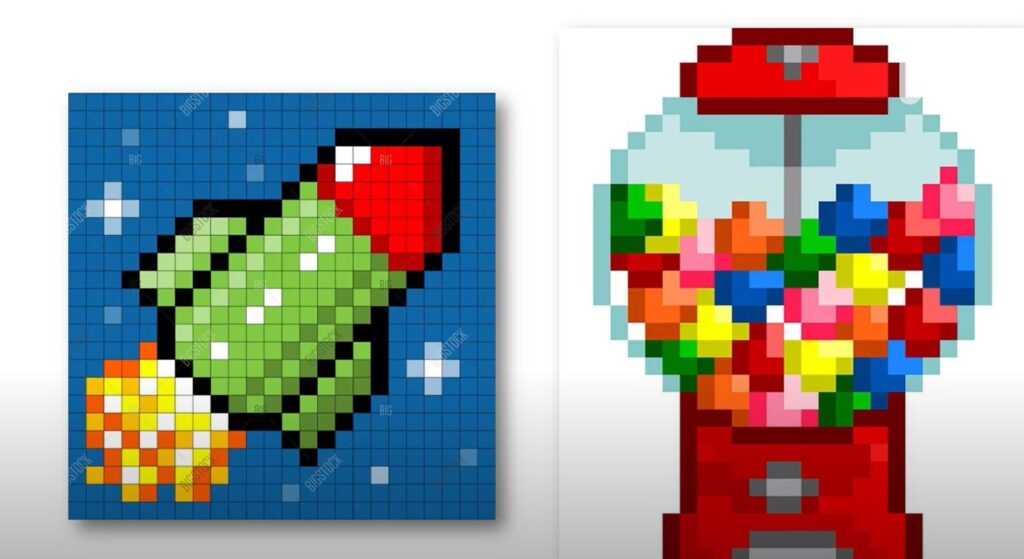

In [31]:
img

## Exercise
#### 1. Explain the advantages and disadvantages of lossless and lossy image file compression schemes.
Lossless compression:<br>
  - Dalam resolusi gambar, ini tidak akan mengubah resolusi gambar. (Advantage)
  - Dalam kemampuan transformasinya, prosesnya reversible. (Advantage)
  - Dalam hal format, biasanya berupa JPEG atau JPG.
  - Dalam hal penyimpanan masih tergolong besar. (Disadvantage)
  
  <br>Lossy compression:</br>
  - Dalam hal resolusi gambar, ini akan menyebabkan resolusi gambar menurun. (Disadvantage)
  - Dalam hal transformasi, sifatnya tidak reversible (Disadvantage)
  - Dalam hal format, biasanya berupa GIF.
  - Penyimpanan sangat irit. (Advantage)

#### 2. The size of an image is 1680 pixels by 1050 pixels. Assume that this image has been sampled using the RGB color system and placed into a raw image file. What is the minimum size of this file in megabytes? (Hint: There are 8 bits in a byte, 1024 bits in a kilobyte, and 1000 kilobytes in a megabyte.)
1. Dalam satu gambar ada $1680*1050$ pixel, dimana setiap pixel mempunyai 3 bits data $=5.292.000$ bits.
2. 1 MB berisi 1.024.000 bits dalam megabytes. Maka ukuran gambar adalah $5.292.000/1.024.000=5,16MB$.

#### 3. Describe the difference between Cartesian coordinates and screen coordinates.
Cartesian:<br>
  - titik tengah dan pusat ada di (0,0)
  - terdapat koordinat negatif
  
  <br>Screen:</br>
  - titik tengah ada di sekitar (height//2, weight//2)
  - pusatnya ada di pojok kiri atas (0,0)
  - didasarkan pada struktur array, cara mengaksesnya tidak ada koordinat negatif

#### 4. Describe how a row-major traversal visits every position in a two-dimensional grid.
Mengunjungi setiap pixel (kolom) di satu baris, kemudian dilanjutkan dengan baris selanjutnya seperti baris sebelumnya.

#### 5. How would a column-major traversal of a grid work? Write a code segment that prints the positions visited by a column-major traversal of a 2-by-3 grid.

```# i itu untuk akses semua row
for i in range(2):
    # j untuk akses column
    for j in range(3):
        # karena disini j di dalam i, maka column akan diselesaikan dulu semuanya dalam 1 row #column, 
        print(f"({i}, {j})", end=" ")
```
#### 6. Explain why one would use the clone method with a given object.
Untuk membuat salinan dari image (clone diganti `copy()`)

#### 7. Why does the blur function need to work with a copy of the original image?
Gambar utama adalah sebagai sumber untuk sampling pixelnya, kemudian dihitung rata-ratanya. Kemudian, rata-rata ini diaplikasikan ke gambar copyannya.
